In [ ]:
!pip install statsmodels

## Descomente y use la siguiente si usa la red con proxy de EPM
# !pip -–proxy proxy.epm.com.co:8080 install statsmodels

# Introduction to Basic Time Series Concepts 


* A **_time series_** is a sequence of observations $\{x_t\}$ collected over time $t$.


* The **_time order_** of data is crucial.


* Data are collected at, for instance, intra-daily, daily, weekly, monthly, quarterly, yearly, and so on, frequencies.


* A key feature is that observations are **_dependent_** on the past,
$\mathbb{P}\left(X_t|\mathcal{F}_{t-1}\right)\neq \mathbb{P}\left(X_t\right)$, where $\mathcal{F}_{t-1}$ is the set of all historical information available until moment $t-1$.


* Applications:
    
    * Economics
    * Finance
    * Marketing
    * Meteorology
    * Engineering
    * Biology
    * $\quad \vdots$
    

* Time series analysis develops statistical methods to:

    * **_Fitting models_** in order to understand the underlying phenomenon that generates the series
    * **_Inference_** (i.e. testing hypotheses, interpretations, associations)
    * Estimating **_unobserved components_** (e.g. trends, seasonal, cyclical, irregular, transitory, volatility) that describe the salient features of the series.
    * **_Forecasting_** future values at different horizons
    * Evaluating the **_effect of interventions_** and calendar-effects
    * **_Mining_** time series (e.g. outliers identification, dimensionality reduction, clustering,...)
    * $\quad\vdots$
    



## Examples of time series

In [1]:
# Load some time series datasets
import pandas as pd
import numpy  as np
from matplotlib import pyplot

# Colombian Stock Market Capitalization Index
data_set = pd.read_csv('colcap.txt', sep = '\t', squeeze = True)
x = data_set['colcap'].values
index = pd.date_range('2008-01-15', periods = len(data_set), freq = 'B')
colcap = pd.DataFrame({'colcap':x}, index = index)

# Colombian Economic Activity Index
data_set = pd.read_csv('imaco.txt', sep = '\t', squeeze = True)
x = data_set['imaco'].values
index = pd.date_range('1992-01', periods = len(data_set), freq = 'M')
imaco = pd.DataFrame({'imaco':x}, index = index)

# Colombian Price Consumption Index
data_set = pd.read_csv('ipc.txt', sep = '\t', squeeze = True)
x = data_set['IPC'].values
index = pd.date_range('1954-07', periods = len(data_set), freq = 'M')
ipc = pd.DataFrame({'ipc':x}, index = index)

# Colombian Industrial Production Index
data_set = pd.read_csv('ipi.txt', sep = '\t', squeeze = True)
x = data_set['ipi'].values
index = pd.date_range('1980-01', periods = len(data_set), freq = 'M')
ipi = pd.DataFrame({'ipi':x}, index = index)

# Colombian Gross Domestic Product
data_set = pd.read_csv('gdp.txt', sep = '\t', squeeze = True)
x = data_set['x'].values
index = pd.date_range('1960-01', periods = len(data_set), freq = 'Q')
gdp = pd.DataFrame({'gdp':x}, index = index)

# COP/USD Exchange Rate
data_set = pd.read_csv('trm.txt', sep = '\t', squeeze = True)
x = data_set['trm'].values
index = pd.date_range('1991-11-27', periods = len(data_set), freq = 'D')
trm = pd.DataFrame({'trm':x}, index = index)

# Colombian Electricity Spot Price
data_set = pd.read_csv('price.csv', sep = '\t', squeeze = True)
p = data_set.values
index = pd.date_range('2000-01-01', periods = len(data_set), freq = 'H')
price = pd.DataFrame({'price':p}, index = index)

# No. of International Airline Passengers 
data_set = pd.read_csv('air.csv', sep = '\t', squeeze = True)
x = data_set.values
index = pd.date_range('1949-01', periods = len(data_set), freq = 'M')
air = pd.DataFrame({'air':x}, index = index)

## Time Series Plots

/home/user/.conda/envs/p37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


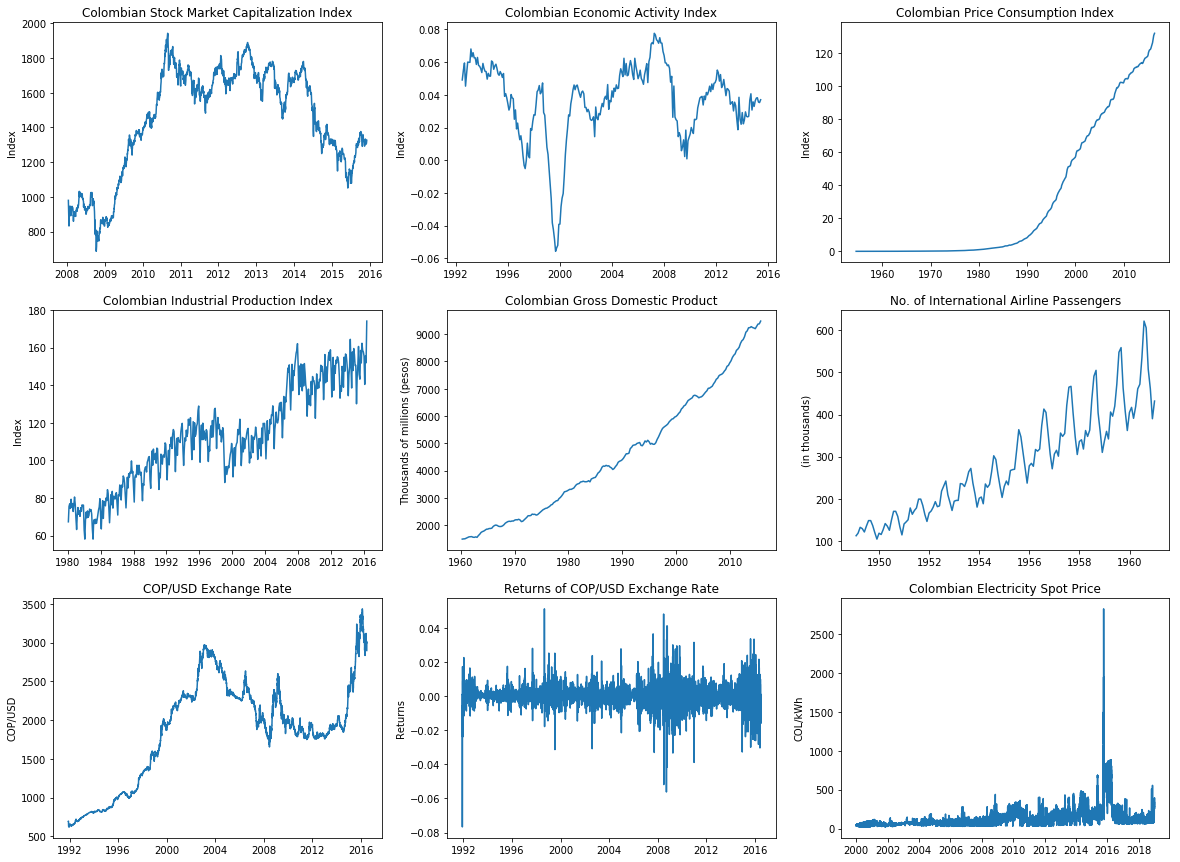

In [2]:
fig, axs = pyplot.subplots(3, 3, figsize=(20, 15), sharey=False)
#
axs[0,0].plot(colcap)
axs[0,0].set_title('Colombian Stock Market Capitalization Index')
axs[0,0].set_ylabel('Index')
axs[0,0].set_xlabel('')
#
axs[0,1].plot(imaco)
axs[0,1].set_title('Colombian Economic Activity Index')
axs[0,1].set_ylabel('Index')
axs[0,1].set_xlabel('')
#
axs[0,2].plot(ipc)
axs[0,2].set_title('Colombian Price Consumption Index')
axs[0,2].set_ylabel('Index')
axs[0,2].set_xlabel('')
#
axs[1,0].plot(ipi)
axs[1,0].set_title('Colombian Industrial Production Index')
axs[1,0].set_ylabel('Index')
axs[1,0].set_xlabel('')
#
axs[1,1].plot(gdp)
axs[1,1].set_title('Colombian Gross Domestic Product')
axs[1,1].set_ylabel('Thousands of millions (pesos)')
axs[1,1].set_xlabel('')
#
axs[1,2].plot(air)
axs[1,2].set_title('No. of International Airline Passengers')
axs[1,2].set_ylabel('(in thousands)')
axs[1,2].set_xlabel('')
#
axs[2,0].plot(trm)
axs[2,0].set_title('COP/USD Exchange Rate')
axs[2,0].set_ylabel('COP/USD')
axs[2,0].set_xlabel('')
#
axs[2,1].plot(np.log(trm).diff())
axs[2,1].set_title('Returns of COP/USD Exchange Rate')
axs[2,1].set_ylabel('Returns')
axs[2,1].set_xlabel('')
#
axs[2,2].plot(price)
axs[2,2].set_title('Colombian Electricity Spot Price')
axs[2,2].set_ylabel('COL/kWh')
axs[2,2].set_xlabel('')
#
pyplot.show()

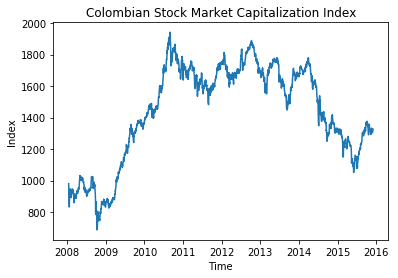

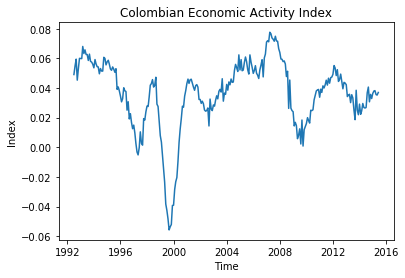

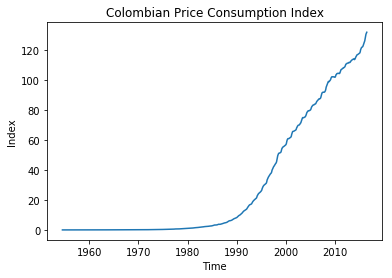

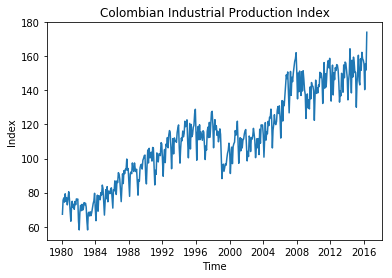

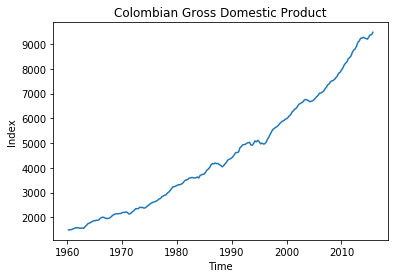

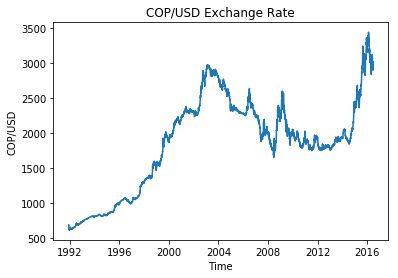

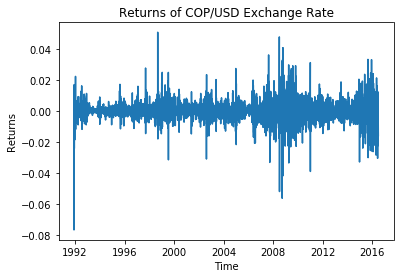

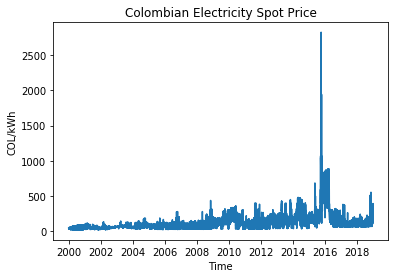

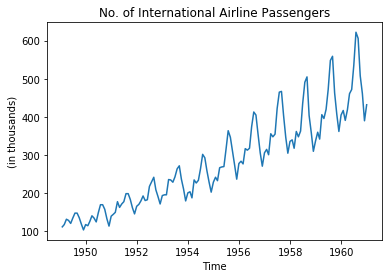

In [3]:
# Individual graphs
pyplot.plot(colcap)
pyplot.title('Colombian Stock Market Capitalization Index')
pyplot.ylabel('Index')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(imaco)
pyplot.title('Colombian Economic Activity Index')
pyplot.ylabel('Index')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(ipc)
pyplot.title('Colombian Price Consumption Index')
pyplot.ylabel('Index')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(ipi)
pyplot.title('Colombian Industrial Production Index')
pyplot.ylabel('Index')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(gdp)
pyplot.title('Colombian Gross Domestic Product')
pyplot.ylabel('Index')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(trm)
pyplot.title('COP/USD Exchange Rate')
pyplot.ylabel('COP/USD')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(np.log(trm).diff())
pyplot.title('Returns of COP/USD Exchange Rate')
pyplot.ylabel('Returns')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(price)
pyplot.title('Colombian Electricity Spot Price')
pyplot.ylabel('COL/kWh')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(air)
pyplot.title('No. of International Airline Passengers')
pyplot.ylabel('(in thousands)')
pyplot.xlabel('Time')
pyplot.show()

# Related Measures of Time Series


* The process $\{X_t,\ t\in \mathbb{Z}\}$ is said to be **_strictly stationary_** if 

$$\left(X_{t_1-k},\ldots,X_{t_n-k}\right)  \overset{d}{=} \left(X_{t_1},\ldots,X_{t_n}\right),$$

for all finite set of indices $\{t_{1}<\cdots<t_{n}\}\subset\mathbb{Z}$, $n\in\mathbb{N}$, and $k$ such that $\{t_{1}-k<\cdots<t_{n}-k\}\subset\mathbb{Z}$.


* The process $\{X_t,\ t\in\mathbb{Z}\}$ is said **_weakly stationary_**, if:

    1. The **_Mean Munction_** of $X_t$ is time-invariant,
    
    $$\mathbb{E}\bigl(X_t\bigr)=\mu \quad \text{for all } \ t\in\mathbb{Z}$$
    
    2. The **_Autocovariance Function_** depends only on the time gap $k=|t-(t-k)|$,
    
    $$\mathrm{Cov}\left(X_{t},X_{t-k}\right)=\mathbb{E}\left(X_t-\mu\right)\left(X_{t-k}-\mu\right)= \gamma_k, \quad \text{for all } \ t,k\in\mathbb{Z}$$


* Note that 2. implies

$$\mathrm{Var}\bigl(X_t\bigr)=\mathrm{Var}\bigl(X_{t-k}\bigr)=\gamma_0<\infty.$$



* The **_Autocorrelation Function (ACF)_**


$$\mathrm{Corr}\bigl(X_t,X_{t-k}\bigr)=\rho_k=\frac{\gamma_k}{\gamma_0},\qquad k\in\mathbb{Z}.$$


* For simplicity, hereafter stationary process will always mean weakly stationary process, unless specified otherwise.


* $\mu$, $\gamma_k$, and $\rho_k$ are **_unknown_** $\Rightarrow$ these have to be estimated with only one realization $X_1,\ldots,X_n$ of the process $X_t$.

    * Sample mean
    $$
    \bar{X}=\frac{1}{n}\sum_{t=1}^{n}X_{t}.
    $$
    * Sample autocovariance function
    $$
    \begin{split}
    \widehat{\gamma}_k&=\frac{1}{n}\sum_{t=1}^{n-k}\left(X_{t}-\bar{X}\right)\left(X_{t+k}-\bar{X}\right)\\
    &=\frac{1}{n}\sum_{t=k+1}^{n}\left(X_{t}-\bar{X}\right)\left(X_{t-k}-\bar{X}\right),\quad \ k=0,1,\ldots,n-1.
    \end{split}
    $$
    * Sample autocorrelation function
    $$
    \begin{split}
    \widehat{\rho}_k&=\frac{\widehat{\gamma}_k}{\widehat{\gamma}_0}\\
    &=\frac{\sum_{t=k+1}^{n}\left(X_{t}-\bar{X}\right)\left(X_{t-k}-\bar{X}\right)}{\sum_{t=1}^{n}\left(X_{t}-\bar{X}\right)^{2}},\quad k=0,1,\ldots,n-1.
    \end{split}
    $$
  
  
* Note that $k$ of the $n$ initial observations are lost.
* Hence, is recommendable to obtain a maximum of $n/4$ autocorrelations.
* The graph of $\widehat{\rho}_k$ versus $k$ is called the **_sample correlogram_**.

# _Statmodels_ library

* It is a Python module for the estimation of different statistical models (including discrete data models, Generalized Linear Models -GLM-, Generalized Additive Models -GAM-, models for survival analysis, time series models, etc.), as well as for conducting statistical tests, and statistical data exploration (missing data, outlier detection, etc.) (https://www.statsmodels.org/stable/index.html/)


<img src='statsmodels_logo.png' width='320' />



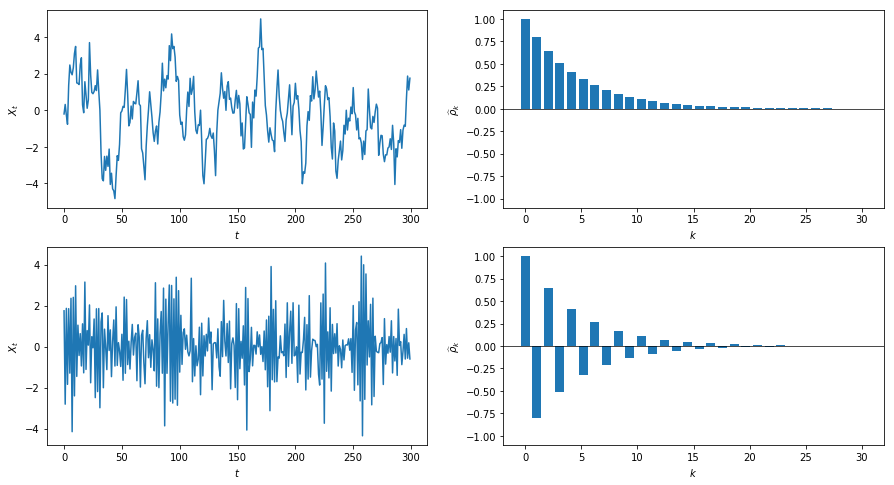

In [4]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_process import arma_acf, arma_pacf
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k=30    # lags
t = np.linspace(1, n, n) # time-trend

fig, axs = pyplot.subplots(2, 2, figsize=(15, 8), sharey=False)
# AR(1) phi=.8
arparams = np.array([.8])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, nsample=n) + constant + trend*t
acf  = arma_acf(ar, ma, lags=k)

axs[0,0].plot(x)
axs[0,0].set_ylabel(r'$X_t$')
axs[0,0].set_xlabel(r'$t$')

axs[0,1].bar(np.linspace(0, len(acf), len(acf)), acf) # width=0.1, color='k'
axs[0,1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[0,1].set_ylim(-1.1,1.1)
axs[0,1].set_ylabel(r'$\widehat{\rho}_k$')
axs[0,1].set_xlabel(r'$k$')

# AR(1) phi=.8
arparams = np.array([-.8])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, nsample=n) + constant + trend*t
acf  = arma_acf(ar, ma, lags=k)

axs[1,0].plot(x)
axs[1,0].set_ylabel(r'$X_t$')
axs[1,0].set_xlabel(r'$t$')

axs[1,1].bar(np.linspace(0, len(acf), len(acf)), acf) # width=0.1, color='k'
axs[1,1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1,1].set_ylim(-1.1,1.1)
axs[1,1].set_ylabel(r'$\widehat{\rho}_k$')
axs[1,1].set_xlabel(r'$k$')
pyplot.show()

* The **_Partial Autocorrelation Function (PACF)_** at lag $k$ of a stationary process $\left\{X_t\right\}$ is the $\text{Corr}(X_t,X_{t-k})$ after *eliminating the linear effect of intermediate variables* $X_{t-1},\ldots,X_{t-k+1}$,

$$
\alpha(k)=\text{Corr}\bigl(X_t,X_{t-k}|\, X_{t-1},\ldots,X_{t-k+1}\bigr)
$$



* The process $\{\varepsilon_t\}$ is called **_white noise_**, denoted as $\{\varepsilon_t\}\sim\mathrm{WN}(0,\sigma^2_\varepsilon)$, if and only if, $\mathbb{E}(\varepsilon_t)=0$, and

$$
\gamma_\varepsilon(k)=
\begin{cases}
\sigma^2_\varepsilon, & \mathrm{if}\ k=0\\
0,		 & \mathrm{if}\ k\neq0
\end{cases}.
$$


* By definition, $\{\varepsilon_t\}$ is a *stationary* process.


* The PACF is 

$$
\widehat{\alpha}_\varepsilon(k)= \widehat{\phi}_{kk}
=\begin{cases}
1, & \mathrm{if}\ k=0\\
0, & \mathrm{if}\ k\neq0
\end{cases}.
$$


* If $\{\varepsilon_t\}$ distributes identically normal, it is called a **_Gaussian white noise_**. 

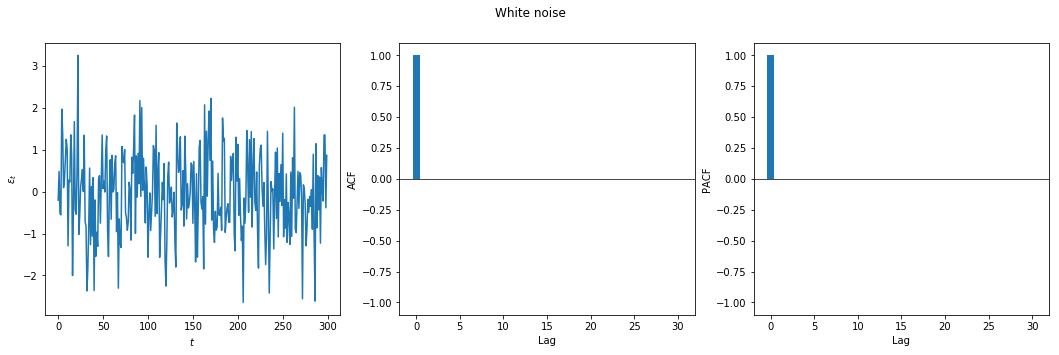

In [5]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_process import arma_acf, arma_pacf
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k=30    # lags

# White noise
arparams = np.array([0])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
x = arma_generate_sample(ar, ma, nsample=n)
acf  = arma_acf(ar, ma, lags=k)
pacf = arma_pacf(ar, ma, lags=k)

#acf  = acf[1:]
#pacf = pacf[1:]

fig, axs= pyplot.subplots(1, 3, figsize=(18, 5), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$\varepsilon_t$')
axs[0].set_xlabel(r'$t$')
#axs[0].set_title('White noise')
#
axs[1].bar(np.linspace(0, len(acf), len(acf)), acf)
axs[1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1].set_ylim(-1.1,1.1)
axs[1].set_ylabel('ACF')
axs[1].set_xlabel('Lag')
#
axs[2].bar(np.linspace(0, len(pacf), len(pacf)), pacf)
axs[2].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[2].set_ylim(-1.1,1.1)
axs[2].set_ylabel('PACF')
axs[2].set_xlabel('Lag')
pyplot.suptitle('White noise')
pyplot.show()

# Basic Time Series Models: AR, MA, ARMA y ARIMA


## Autoregressive-Moving Average (ARMA) Processes
	
* The $\left\{X_t\right\}$ is called an **_Autoregressive-Moving Average_** process, denoted as $\mathrm{ARMA}(p,q)$, if $\forall t$,


$$
X_{t}= \phi_{1}X_{t-1}+\cdots+\phi_{p}X_{t-p}+\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\cdots+\theta_{q}\varepsilon_{t-q},
$$

where $\left\{\epsilon_{t}\right\}$ is white noise.

   * The constant $p\in\mathbb{N}_0$ is the order of the autoregressive part of the process.
   * The constant $q\in\mathbb{N}_0$ is the order of the moving average part of the process.


* In terms of the backward operator, the $\mathrm{ARMA}(p,q)$ process can be written compactly as

$$
\phi_{p}(B)X_{t}=\theta_{q}(B)\varepsilon_{t},
$$

where $\phi_{p}(z)=1-\phi_{1}z-\cdots-\phi_{p}z^{p}$ and $\theta_{q}(z)=1+\theta_{1}z+\cdots+\theta_{q}z^{q}$, where the *backward shift* or *lag operator* is defined as, $B^jX_t:=X_{t-j},\ j\in\mathbb{z}$.


## Autoregressive (AR) process

* If $q=0$, which implies $\theta_{q}(z)\equiv1$ , then the process is said to be an **_autoregressive_** process of order $p$, $\mathrm{AR}(p)$,


$$
X_{t}= \phi_{1}X_{t-1}+\cdots+\phi_{p}X_{t-p}+\varepsilon_{t}
$$

* Or, in terms of the backward operator,

$$
\phi_{p}(B)X_{t}=\varepsilon_{t},
$$

where $\phi_{p}(z)=1-\phi_{1}z-\cdots-\phi_{p}z^{p}$.


## Moving-average (MA) process

* If $p=0$, which implies $\phi_{p}(z)\equiv1$ , then the process is said to be a **_moving-average_** process of order $q$, $\mathrm{MA}(q)$,

$$
X_{t}=\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\cdots+\theta_{q}\varepsilon_{t-q},
$$

* Or, in terms of the backward operator,
$$
X_{t}=\theta_{q}(B)\varepsilon_{t},
$$

where $\theta_{q}(z)=1+\theta_{1}z+\cdots+\theta_{q}z^{q}$.

### Theoretical ACF and PACF of ARMA processes

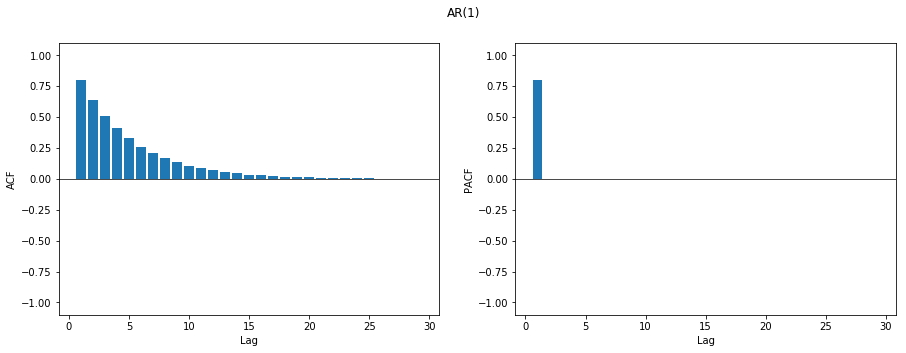

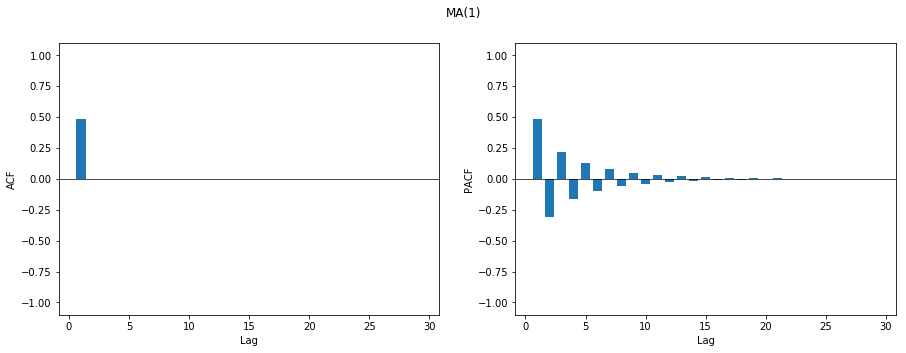

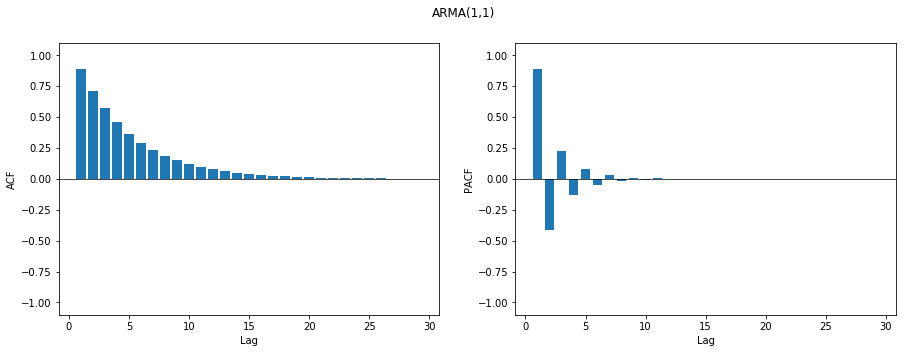

In [6]:
from statsmodels.tsa.arima_process import arma_acf, arma_pacf
from matplotlib import pyplot

k=30 # lags

'''
# White noise
arparams = np.array([0])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
acf  = arma_acf(ar, ma, lags=k)
pacf = arma_pacf(ar, ma, lags=k)

acf  = acf[1:]
pacf = pacf[1:]

fig, axs = pyplot.subplots(1, 2, figsize=(11.5, 4), sharey=False)
axs[0].bar(np.linspace(1, len(acf), len(acf)), acf)
axs[0].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[0].set_ylim(-1.1,1.1)
axs[0].set_ylabel('ACF')
axs[0].set_xlabel('Lag')
#
axs[1].bar(np.linspace(1, len(pacf), len(pacf)), pacf)
axs[1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1].set_ylim(-1.1,1.1)
axs[1].set_ylabel('PACF')
axs[1].set_xlabel('Lag')
pyplot.suptitle('White noise')
pyplot.show()
'''

# AR(1)
arparams = np.array([.8])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
acf  = arma_acf(ar, ma, lags=k)
pacf = arma_pacf(ar, ma, lags=k)

acf  = acf[1:]
pacf = pacf[1:]

fig, axs = pyplot.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].bar(np.linspace(1, len(acf), len(acf)), acf) # width=0.1, color='k'
axs[0].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[0].set_ylim(-1.1,1.1)
axs[0].set_ylabel('ACF')
axs[0].set_xlabel('Lag')
#
axs[1].bar(np.linspace(1, len(pacf), len(pacf)), pacf)
axs[1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1].set_ylim(-1.1,1.1)
axs[1].set_ylabel('PACF')
axs[1].set_xlabel('Lag')
pyplot.suptitle('AR(1)')
pyplot.show()

# MA(1)
arparams = np.array([0])
maparams = np.array([0.8])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
acf  = arma_acf(ar, ma, lags=k)
pacf = arma_pacf(ar, ma, lags=k)

acf  = acf[1:]
pacf = pacf[1:]

fig, axs = pyplot.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].bar(np.linspace(1, len(acf), len(acf)), acf)
axs[0].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[0].set_ylim(-1.1,1.1)
axs[0].set_ylabel('ACF')
axs[0].set_xlabel('Lag')
#
axs[1].bar(np.linspace(1, len(pacf), len(pacf)), pacf)
axs[1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1].set_ylim(-1.1,1.1)
axs[1].set_ylabel('PACF')
axs[1].set_xlabel('Lag')
pyplot.suptitle('MA(1)')
pyplot.show()

# ARMA(1,1)
arparams = np.array([.8])
maparams = np.array([.6])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
acf  = arma_acf(ar, ma, lags=k)
pacf = arma_pacf(ar, ma, lags=k)

acf  = acf[1:]
pacf = pacf[1:]

fig, axs = pyplot.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].bar(np.linspace(1, len(acf), len(acf)), acf)
axs[0].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[0].set_ylim(-1.1,1.1)
axs[0].set_ylabel('ACF')
axs[0].set_xlabel('Lag')
#
axs[1].bar(np.linspace(1, len(pacf), len(pacf)), pacf)
axs[1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1].set_ylim(-1.1,1.1)
axs[1].set_ylabel('PACF')
axs[1].set_xlabel('Lag')
pyplot.suptitle('ARMA(1,1)')
pyplot.show()

### Sample ACF and PACF of simulated ARMA processes

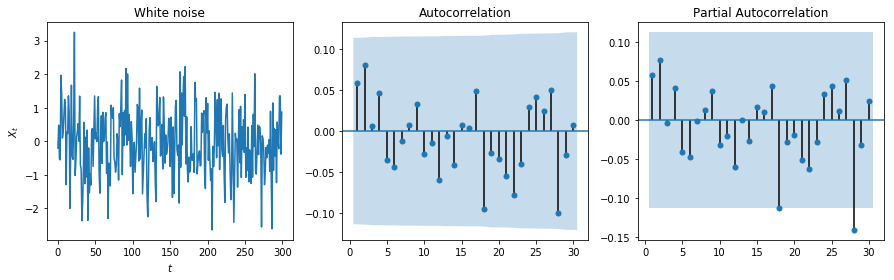

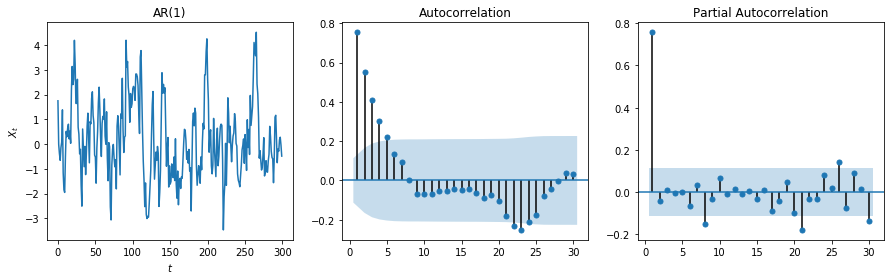

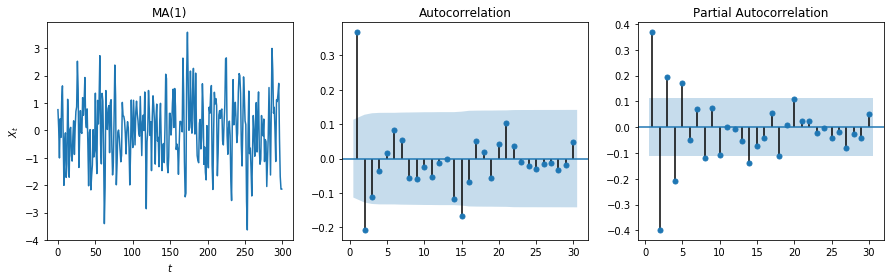

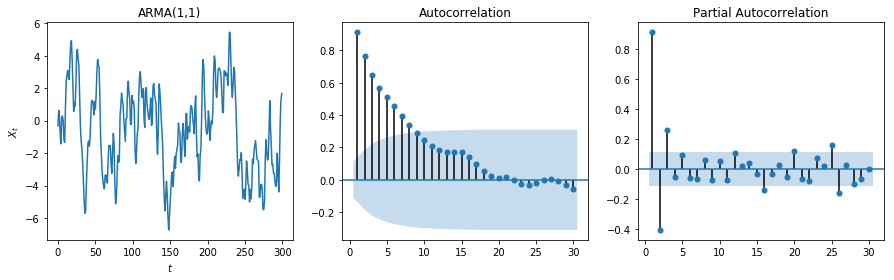

In [7]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k=30    # lags

# White noise
arparams = np.array([0])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
x = arma_generate_sample(ar, ma, nsample=n)

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('White noise')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# AR(1)
arparams = np.array([.8])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
x = arma_generate_sample(ar, ma, nsample=n)

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('AR(1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# MA(1)
arparams = np.array([0])
maparams = np.array([0.8])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
x = arma_generate_sample(ar, ma, nsample=n)

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('MA(1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# ARMA(1,1)
arparams = np.array([.8])
maparams = np.array([.6])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
x = arma_generate_sample(ar, ma, nsample=n)

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('ARMA(1,1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

## Model Identification of $\mathrm{ARMA}(p,q)$ Processes

    
|Function\Process |$\mathrm{AR}(p)$       | $\mathrm{MA}(q)$     | $\mathrm{ARMA}(p,q)$|
|:---------------:|:---------------------:|:--------------------:|:-------------------:|
|$\mathrm{ACF}$	  |	Tails off             | Cut of after lag $q$ | Tails off           |
|$\mathrm{PACF}$  |	Cut of after lag $p$  | Tails off            | Tails off           |

# Diagnostic checking

* In time series modeling it is important to perform diagnostic checking of the fitted model.


* It is, to study if the fitted model gives an adequate description of the data.


* Diagnostic checks can suggest directions to improve the existing model.


* Principal diagnostic checks for univariate linear series models:

    * Model selection criteria
    * Stationarity and invertibility
    * Serial correlation of the residuals $\hat{\varepsilon}_t$
    * Normality of residuals $\hat{\varepsilon}_t$
    * Presence of outliers


#### Model selection criteria

* Akaike information criterion (AIC)
$$
\begin{split}
\mathrm{AIC}
&= -2\mathrm{loglik} + 2 M\\
&=n\log\hat{\sigma}_\varepsilon^2+ 2 M
\end{split}
$$
where $\mathrm{loglik}$ is the maximized log-likelihood function, and $M$ the number of parameters in the model, $p+q+1$, if it includes a constant term.


* Bayesian information criterion (BIC)
$$
\begin{split}
\mathrm{BIC}
&= -2\mathrm{loglik} + M\log n\\
&=n\log\hat{\sigma}_\varepsilon^2+ M\log n.
\end{split}
$$


* Small values of AIC and BIC indicates a model with a low test error.


#### No autocorrelation in the residuals

* ACF of residuals


* Statistical test

$$
\begin{split}
H_0&:\rho_1=\cdots=\rho_K=0\\
H_1&:\rho_k\neq 0\ \text{for some } k\in\{1,\ldots,K\}.
\end{split}
$$


   * It can be contrasted by using the Box–Pierce or Ljung–Box Q-statistics:
    
    $$
    Q_{\text{Box–Pierce}}=n\sum_{k=1}^{K}\hat{\rho}_k^2(\hat{\varepsilon}) \xrightarrow[n\to\infty]{\mathcal{D}} \chi^2_{K-p-q},
    $$
    
    and
    
    $$
    Q_{\text{Ljung–Box}}=n(n+2)\sum_{k=1}^{K}\frac{\hat{\rho}_k^2(\hat{\varepsilon})}{n-k} \xrightarrow[n\to\infty]{\mathcal{D}} \chi^2_{K-p-q},
    $$
    
    where $\hat{\rho}_k(\hat{\varepsilon})$ is the autocorrelation function at lag $k$ of residuals.
    
   
   * The value $K$ is chosen arbitrarily, usually, $K = 20$.

   
   * $H_0$ is rejected at level $\alpha$ if the value of $Q$ exceeds the $(1-\alpha)$-quantile of the $\chi^2_{K-p-q}$ distribution.


#### Normality of $\varepsilon$

$$
\begin{split}
H_0&:\varepsilon\sim\mathcal{N}\\
H_1&:\varepsilon\nsim\mathcal{N}.
\end{split}
$$


* Jarque-Bera test statistic

$$
\mathrm{JB}=n\left[
\frac{\hat{\alpha}_3^2}{6} +\frac{(\hat{\alpha}_4-3)^2}{24}\right] 
\xrightarrow[n\to\infty]{\mathcal{D}}\chi_2^2,
$$

where

$$
\hat{\alpha}_3=  \frac{(n-1)^{-1}\sum_{t=1}^{n}\hat{\varepsilon}_t^3}{\hat{\sigma}_{\hat{\varepsilon}}^3}\quad\text{and}\quad
\hat{\alpha}_4= \frac{(n-1)^{-1}\sum_{t=1}^{n}\hat{\varepsilon}_t^4}{\hat{\sigma}_{\hat{\varepsilon}}^4},
$$

are the residuals skewness and kurtosis coefficients, respectively, and $\hat{\sigma}_{\hat{\varepsilon}}=\left[(n-1)^{-1}\sum_{t=1}^{n}\hat{\varepsilon}_t^2\right] ^{1/2}$.


* $H_0$ is rejected at level $\alpha$ if the value of JB exceeds the $(1-\alpha)$-quantile of the $\chi^2_{2}$ distribution.


* Quantile-Quantile plot


* Shapiro–Wilk


* $\vdots$

# Estimation and Diagnostic of AR models

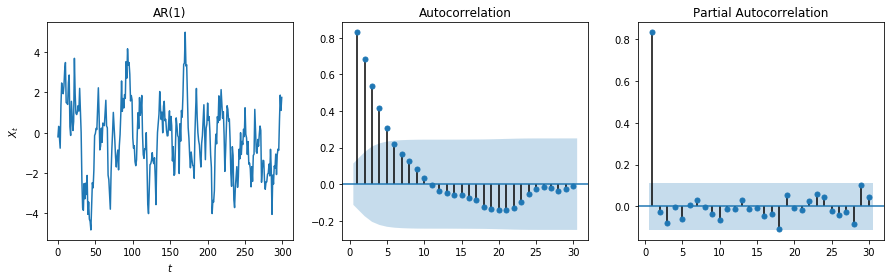

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  300
Model:                     AutoReg(1)   Log Likelihood                -420.963
Method:               Conditional MLE   S.D. of innovations              0.989
Date:                Wed, 11 Mar 2020   AIC                             -0.009
Time:                        02:13:36   BIC                              0.016
Sample:                             1   HQIC                             0.001
                                  300                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.8388      0.032     26.497      0.000       0.777       0.901
                                    Roots                                    
                  Real          Imaginary           M

/home/user/.conda/envs/p37/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:1919: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead
  res = het_arch(self.resid, maxlag=lag, autolag=None)


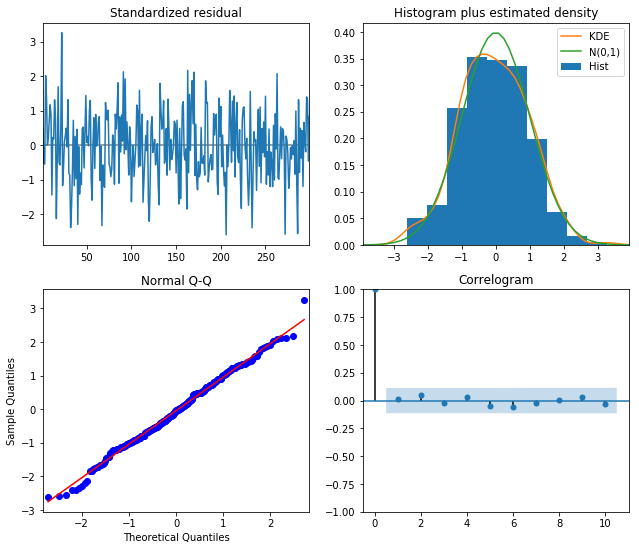

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  300
Model:                     ARMA(1, 0)   Log Likelihood                -422.480
Method:                       css-mle   S.D. of innovations              0.987
Date:                Wed, 11 Mar 2020   AIC                            848.960
Time:                        02:13:37   BIC                            856.368
Sample:                             0   HQIC                           851.925
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8360      0.031     26.699      0.000       0.775       0.897
                                    Roots                                    
                  Real          Imaginary           M

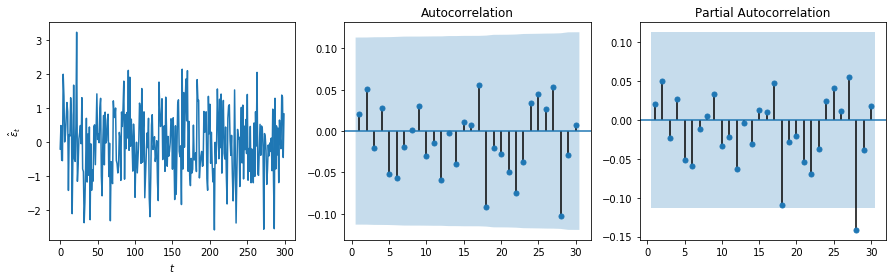

Test of No Serial Correlation
       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.126003   0.722612   0.124752   0.723937
2    0.896864   0.638629   0.885402   0.642299
3    1.021874   0.795959   1.008342   0.799233
4    1.266506   0.867032   1.248114   0.870115
5    2.090216   0.836526   2.052731   0.841802
6    3.073418   0.799577   3.009889   0.807605
7    3.193495   0.866544   3.126387   0.873069
8    3.194400   0.921572   3.127262   0.926119
9    3.485701   0.941899   3.407953   0.945907
10   3.768079   0.957203   3.679110   0.960664
11   3.829425   0.974644   3.737816   0.976969
12   4.950059   0.959626   4.806500   0.964132
13   4.952083   0.976233   4.808423   0.979172
14   5.459223   0.978340   5.288695   0.981375
15   5.501371   0.986963   5.328470   0.988961
16   5.518685   0.992511   5.344753   0.993756
17   6.519304   0.988961   6.282419   0.991078
18   9.250701   0.953649   8.832928   0.963488
19   9.386038   0.966503   8.958854   0.974157
20   9.634479   0.974326   9.

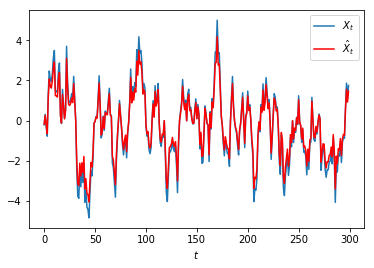

In [8]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model      import AutoReg, AutoRegResults
from statsmodels.tsa.arima_model   import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.stats.diagnostic  import acorr_ljungbox
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k = 30  # lags
t = np.linspace(1, n, n) # time-trend

# Simulated AR(1) process
arparams = np.array([.8])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, nsample=n) + constant + trend*t

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('AR(1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Estimation

# AutoReg(p)
model = AutoReg(x, lags=1, trend='n', seasonal=False, exog=None, period=None).fit()  # trend = {‘n’,’c’,’t’,’ct’}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nFPE: %.3f' % model.fpe, '\nlogL: %.3f' % model.llf)
#print(model.params)
#print(model.roots)
print(model.diagnostic_summary())
model.plot_diagnostics(lags=10, fig=None, figsize=(10.5, 9))
pyplot.show()

# also ARMA(p,0)
model = ARMA(x, order=(1,0)).fit(trend='nc')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('AR parameters: %.3f' % model.arparams)

# also ARIMA(p,0,0)
model = ARIMA(x, order=(1,0,0)).fit(trend='nc')  # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('AR parameters: %.3f' % model.arparams)

# Diagnostics

res = model.resid
# also 
#y_fit = model.predict()
#res = y.price - y_fit

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0].set_xlabel(r'$t$')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()


# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n', acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))

x_f = model.predict(start=1, end=n)

pyplot.plot(x, label=r'$X_t$')
pyplot.plot(x_f, label=r'$\hat{X}_t$', color='r')
pyplot.xlabel(r'$t$')
pyplot.legend(loc='upper right')
pyplot.show()

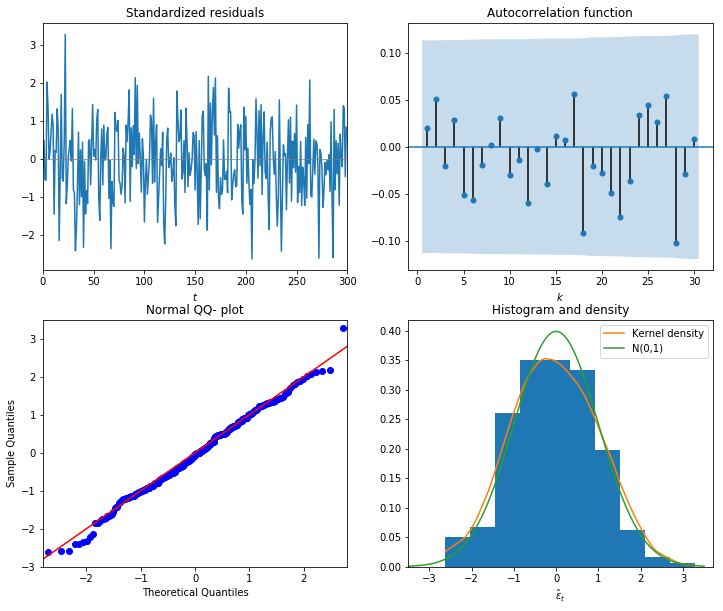

In [9]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#Standardized
res = res/np.std(res)

fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
axs[1,0].set_ylim(-3,3.5)
axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(-3.5, 3.5, 0.001), stats.norm.pdf(np.arange(-3.5, 3.5, 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(-3.5,3.7)
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

## Estimation and Diagnostic of MA models

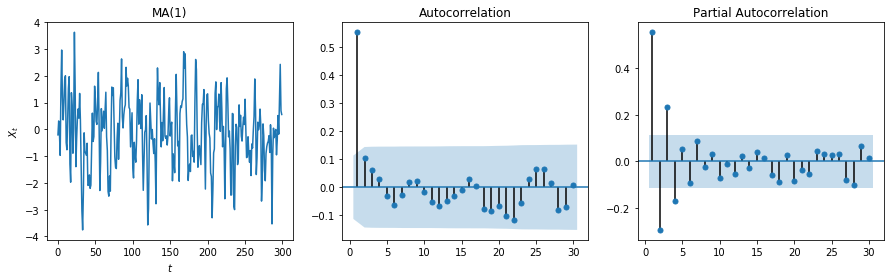

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  300
Model:                     ARMA(0, 1)   Log Likelihood                -423.133
Method:                       css-mle   S.D. of innovations              0.990
Date:                Wed, 11 Mar 2020   AIC                            850.265
Time:                        02:13:42   BIC                            857.673
Sample:                             0   HQIC                           853.230
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7932      0.037     21.671      0.000       0.721       0.865
                                    Roots                                    
                  Real          Imaginary           M

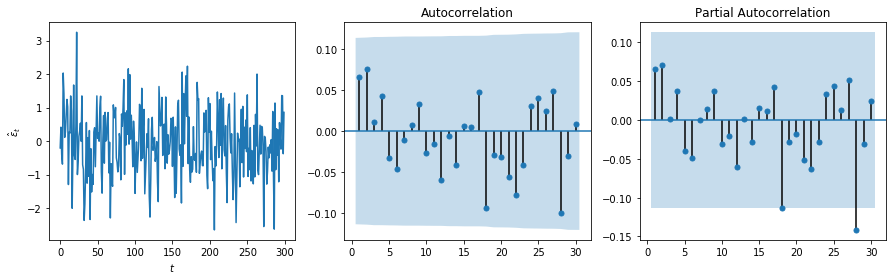

Test of No Serial Correlation
       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    1.288492   0.256326   1.275692   0.258702
2    2.999329   0.223205   2.963869   0.227198
3    3.032953   0.386572   2.996936   0.392098
4    3.596830   0.463309   3.549611   0.470375
5    3.926152   0.560097   3.871299   0.568091
6    4.584962   0.598034   4.512658   0.607651
7    4.619796   0.706248   4.546453   0.715117
8    4.635757   0.795702   4.561886   0.803210
9    4.964985   0.837350   4.879122   0.844716
10   5.193029   0.877916   5.098105   0.884529
11   5.264712   0.917672   5.166702   0.922825
12   6.356038   0.897082   6.207437   0.905266
13   6.365663   0.931827   6.216584   0.937914
14   6.891412   0.938817   6.714479   0.945159
15   6.903617   0.960269   6.725996   0.964812
16   6.912822   0.974905   6.734653   0.978043
17   7.650532   0.973460   7.425951   0.977333
18  10.440624   0.916571  10.031269   0.930881
19  10.707076   0.933299  10.279192   0.945719
20  11.024301   0.945590  10.

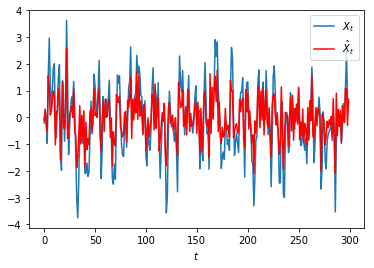

In [10]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model      import AutoReg, AutoRegResults
from statsmodels.tsa.arima_model   import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.stats.diagnostic  import acorr_ljungbox
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k=30    # lags
t = np.linspace(1, n, n) # time-trend

# Simulated MA(1) process
arparams = np.array([0])
maparams = np.array([0.8])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, nsample=n) + constant + trend*t

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('MA(1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Estimation

# MA(q) = ARMA(0,q)
model = ARMA(x, order=(0,1)).fit(trend='nc')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('MA parameters: %.3f' % model.maparams)

# also ARIMA(0,0,q)
model = ARIMA(x, order=(0,0,1)).fit(trend='nc') # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('MA parameters: %.3f' % model.maparams)

# Diagnostics

res = model.resid

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0].set_xlabel(r'$t$')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n',acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))

x_f = model.predict(start=1, end=n)

pyplot.plot(x, label=r'$X_t$')
pyplot.plot(x_f, label=r'$\hat{X}_t$', color='r')
pyplot.xlabel(r'$t$')
pyplot.legend(loc='upper right')
pyplot.show()

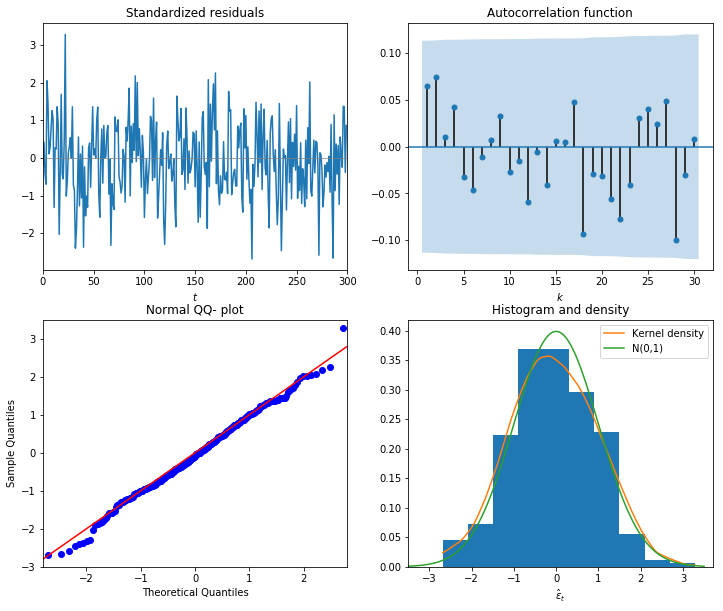

In [11]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#Standardized
res = res/np.std(res)

fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
axs[1,0].set_ylim(-3,3.5)
axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(-3.5, 3.5, 0.001), stats.norm.pdf(np.arange(-3.5, 3.5, 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(-3.5,3.7)
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

# Estimation and Diagnostic of ARMA models

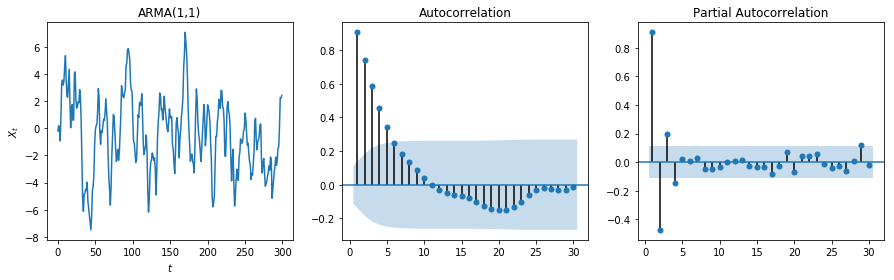

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  300
Model:                     ARMA(1, 1)   Log Likelihood                -422.997
Method:                       css-mle   S.D. of innovations              0.987
Date:                Wed, 11 Mar 2020   AIC                            851.993
Time:                        02:13:44   BIC                            863.105
Sample:                             0   HQIC                           856.440
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8393      0.032     25.995      0.000       0.776       0.903
ma.L1.y        0.5819      0.047     12.495      0.000       0.491       0.673
                                    Roots           

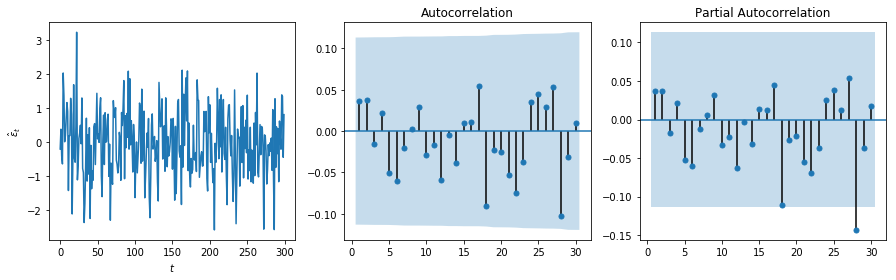

Test of No Serial Correlation
       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.400925   0.526612   0.396942   0.528673
2    0.827539   0.661153   0.817906   0.664345
3    0.898120   0.825882   0.887318   0.828487
4    1.041124   0.903497   1.027481   0.905601
5    1.846467   0.869955   1.814157   0.874216
6    2.966051   0.813096   2.904083   0.820786
7    3.098959   0.875699   3.033031   0.881930
8    3.100321   0.927905   3.034347   0.932184
9    3.361860   0.948207   3.286360   0.951852
10   3.619561   0.962882   3.533821   0.965937
11   3.704241   0.977784   3.614856   0.979862
12   4.795216   0.964471   4.655257   0.968514
13   4.801596   0.979305   4.661320   0.981912
14   5.282414   0.981481   5.116664   0.984122
15   5.312355   0.989135   5.144919   0.990827
16   5.353519   0.993697   5.183629   0.994762
17   6.286823   0.991042   6.058216   0.992786
18   8.941648   0.961079   8.537225   0.969520
19   9.115873   0.971505   8.699335   0.978147
20   9.323773   0.978845   8.

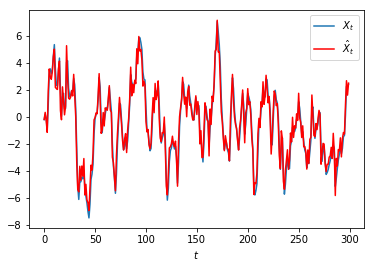

In [12]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model      import AutoReg, AutoRegResults
from statsmodels.tsa.arima_model   import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.stats.diagnostic  import acorr_ljungbox
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k=30 # lags
t = np.linspace(1, n, n) # time-trend

# Simulated ARMA(1,1) process
arparams = np.array([.8])
maparams = np.array([.6])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, nsample=n) + constant + trend*t

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('ARMA(1,1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Estimation

# ARMA(p,q)
model = ARMA(x, order=(1,1)).fit(trend='nc')       # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('AR parameters: %.3f' % model.arparams,'\nMA parameters: %.3f' % model.maparams)

# also ARIMA(p,0,q)
model = ARIMA(x, order=(1,0,1)).fit(trend='nc')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('AR parameters: %.3f' % model.arparams,'\nMA parameters: %.3f' % model.maparams)

# Diagnostics

res = model.resid

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0].set_xlabel(r'$t$')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n',acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))

x_f = model.predict(start=1, end=n)

pyplot.plot(x, label=r'$X_t$')
pyplot.plot(x_f, label=r'$\hat{X}_t$', color='r')
pyplot.xlabel(r'$t$')
pyplot.legend(loc='upper right')
pyplot.show()

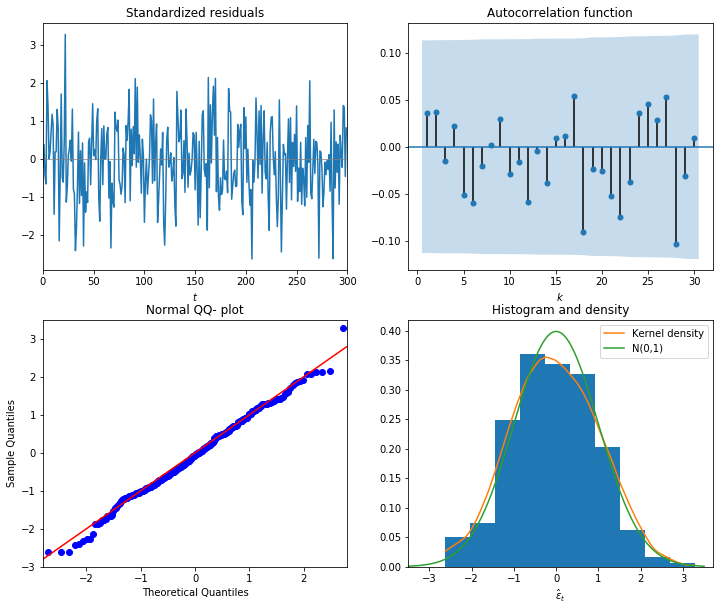

In [13]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#Standardized
res = res/np.std(res)

fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
axs[1,0].set_ylim(-3,3.5)
axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(-3.5, 3.5, 0.001), stats.norm.pdf(np.arange(-3.5, 3.5, 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(-3.5,3.7)
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

# Forecasting

Expected = -2.760499, Forecasted = -2.905894
Expected = -2.123129, Forecasted = -2.512534
Expected = -2.720189, Forecasted = -1.931467
Expected = -2.343180, Forecasted = -2.476571
Expected = -1.471836, Forecasted = -2.132992
Expected = -1.366956, Forecasted = -1.338858
Expected = 0.120847, Forecasted = -1.243491
Expected = 2.256813, Forecasted = 0.109836
Expected = 2.228977, Forecasted = 2.051386
Expected = 2.417179, Forecasted = 2.026480
MSE: 0.791, RMSE: 0.889


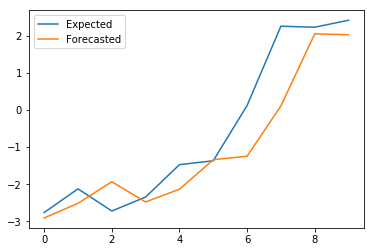

In [14]:
import numpy as np
from statsmodels.tsa.arima_model   import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error

h = 10         # h-step ahead horizont
n = len(x) - h # number of train observations
train, test = x[0:n], x[n:len(x)]

history = [x for x in train]
forecasts = list()
#ci = list()
for t in range(h):
    model = ARIMA(history, order=(1,0,0)).fit(trend = 'nc') # training
    output = model.forecast()
    x_f = output[0]  # forecasts
    ci_f = output[2] # forecast confidence interval
    forecasts.append(x_f)
#    ci.append(ci_f)
    obs = test[t]
    history.append(obs)
    print('Expected = %f, Forecasted = %f'  % (obs, x_f))

print('MSE: %.3f, RMSE: %.3f' % (mean_squared_error(test, forecasts), np.sqrt(mean_squared_error(test, forecasts))))

pyplot.plot(test, label='Expected')
pyplot.plot(forecasts, label='Forecasted')
pyplot.legend()
pyplot.show()

## Power transformations

* These are a class of parametric and monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

### Box–Cox transformation

$$
x^{(\lambda)} =
\begin{cases}
\dfrac{x^\lambda - 1}{\lambda} & \text{if } \ \lambda \neq 0\\[5pt]
\log(x)                        & \text{if } \ \lambda = 0
\end{cases}
$$


* This transformation is only applied to strictly positive data.

### Yeo-Johnson transformation

$$
x^{(\lambda)} =
\begin{cases}
[(x + 1)^\lambda - 1] / \lambda & \text{if } \ \lambda \neq 0, \ x \geq 0\\[5pt]
\log{(x + 1)} & \text{if } \ \lambda = 0, \ x \geq 0\\[5pt]
-[(-x + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \ \lambda \neq 2, \ x < 0\\[5pt]
- \log(- x + 1) & \text{if } \ \lambda = 2, \ x < 0
\end{cases}
$$


* The transformation parameter $\lambda$ is obtained through maximum likelihood.

Refer to:

* https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/

* https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-transformer

Optimal lambda: 0.148


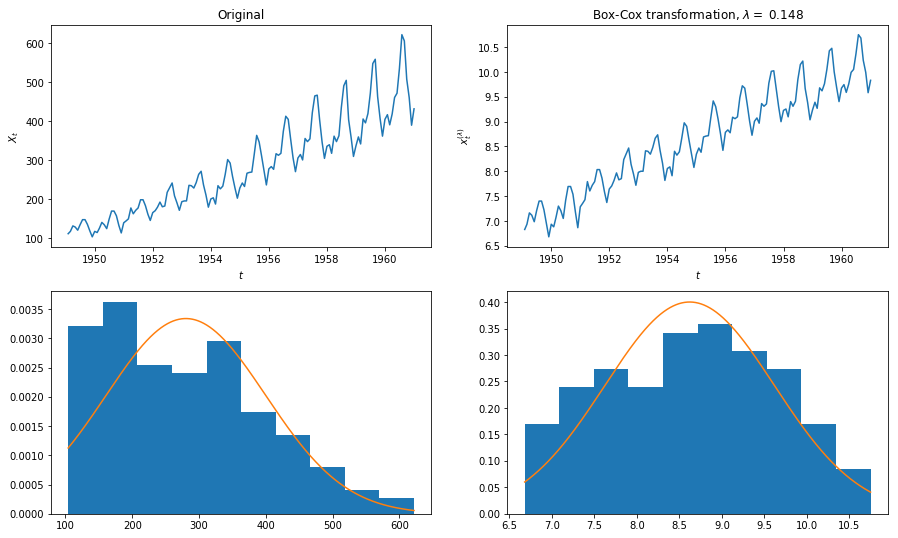

In [15]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot
from scipy import stats

# No. of International Airline Passengers 
data_set = pd.read_csv('air.csv', sep = '\t', squeeze = True)
x = data_set.values
index = pd.date_range('1949-01', periods = len(data_set), freq = 'M')
air = pd.DataFrame({'air':x}, index = index)

z, fitted_lambda = stats.boxcox(x) # stats.boxcox(x+np.max(x))

air_bc = pd.DataFrame({'air':z}, index = index)

print('Optimal lambda: %.3f' %  fitted_lambda) # it is that maximizes the log-likelihood function 

fig, axs= pyplot.subplots(2, 2, figsize=(15, 9), sharey=False)
axs[0,0].plot(air)
axs[0,0].set_ylabel(r'$X_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Original')
axs[1,0].hist(air.values, density=True)
y = np.arange(np.min(air.values), np.max(air.values), 0.001)
axs[1,0].plot(y, stats.norm.pdf(y, np.mean(air.values),np.std(air.values)),  label = 'N(0,1)') # N(0,1)

#
axs[0,1].plot(air_bc)
axs[0,1].set_ylabel(r'$x^{(\lambda)}_t$')
axs[0,1].set_xlabel(r'$t$')
axs[0,1].set_title(r'Box-Cox transformation, $\lambda=$ %.3f'% fitted_lambda)
axs[1,1].hist(air_bc.values, density=True)
y = np.arange(np.min(air_bc.values), np.max(air_bc.values), 0.001)
axs[1,1].plot(y, stats.norm.pdf(y, np.mean(air_bc.values),np.std(air_bc.values)),  label = 'N(0,1)') # N(0,1)

pyplot.show()